# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [3]:
import os

practice_dir_path = r'C:\Users\Danil\2024-ostroverkh-TimeSeriesCourse\practice\04 Matrix profile'
os.chdir(practice_dir_path)

Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [5]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [7]:
!pip install stumpy

In [7]:
import pandas as pd
import numpy as np
import os
import datetime


from modules.mp import compute_mp
from modules.plots import *
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [11]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [14]:
plot_ts(ts, "Input time series")

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [17]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}

mp=compute_mp(ts, m, excl_zone)

Визуализируйте найденный матричный профиль ряда.

In [19]:
plot_ts(mp['mp'], "Matrix Profile")

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [22]:
top_k = 6
motifs = {}

top_k_idxs = stumpy.motifs(ts, mp['mp'], max_matches=top_k)[1][0]

motifs['indices'] = [sorted([top_k_idxs[i], top_k_idxs[i+1]]) for i in range(0, len(top_k_idxs)-1, 2)]

In [24]:
motifs['indices']

[[17852, 18188], [26757, 26925], [9115, 18020]]

Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

In [27]:
plot_motifs(mp, motifs)

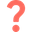
Проанализируйте и изложите содержательный смысл полученных результатов.

С помощью вычисленного матричного профиля можно найти топ-к мотивов ряда. Мы обнаружили 3 схожих между собой мотива.

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [30]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

In [34]:
m = 96
excl_zone = int(np.ceil(m / 2))
mp = {}
ts = ts.astype(np.float64)
mp=compute_mp(ts, m, excl_zone)

In [36]:
top_k = 15
discords = {}

discords=top_k_discords(mp, top_k)

Выполните визуализацию найденных top-$k$ диссонансов.

In [38]:
plot_discords(mp, discords)

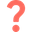
Проанализируйте и изложите содержательный смысл полученных результатов.

С помощью вычисленного матричного профиля можно найти топ-к диссонансов ряда. Мы выявили 15 диссонансов.

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [42]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

In [45]:
plot_ts(ts, "Input time series")

Найдите и визуализируйте матричный профиль временного ряда.

In [48]:
m = 100
excl_zone = m
mp = {}

mp=compute_mp(ts, m, excl_zone)

In [50]:
plot_ts(mp['mp'], "Matrix Profile")

Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [52]:
import numpy as np

def calculate_threshold(mp, threshold_multiplier=0.95):

    profile_distances = np.array(mp['mp'], dtype=float)
    finite_max = np.max(profile_distances[np.isfinite(profile_distances)])

    profile_distances[np.isposinf(profile_distances)] = finite_max

    if np.all(profile_distances == profile_distances[0]):
        return profile_distances[0]

    median_distance = np.median(profile_distances)
    print("Median distance:", median_distance)

    std_distance = np.std(profile_distances)
    print("Standard deviation distance:", std_distance)

    threshold = median_distance - threshold_multiplier * std_distance
    print("Calculated threshold:", threshold)

    return threshold

threshold = calculate_threshold(mp)

Median distance: 4.339771236294555
Standard deviation distance: 3.219644246989549
Calculated threshold: 1.281109201654484


Выполните визуализацию результатов сегментации повторяющихся активностей.

In [54]:
plot_segmentation(mp, threshold)

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [56]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# 1. Загрузка истинных меток из pamap_labels.csv

# 2. Получение предсказанных меток (на основе матричного профиля и порога)
def segment_activities(mp, threshold):
    profile_distances = np.array(mp['mp'], dtype=float)
    predicted_labels = np.zeros(len(profile_distances), dtype=int)

    predicted_labels[profile_distances > threshold] = 1  # Подъем по лестнице
    predicted_labels[profile_distances < threshold / 2] = 2  # Спуск с лестницы

    return predicted_labels

predicted_labels = segment_activities(mp, threshold)

# Проверка длины массивов
print(f"Длина true_labels: {len(labels)}")
print(f"Длина predicted_labels: {len(predicted_labels)}")

# Приведение длин к одному размеру
min_length = min(len(labels), len(predicted_labels))
labels = labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# 3. Вычисление точности по метрике accuracy
accuracy = accuracy_score(labels, predicted_labels)
print(f"Точность сегментации по метрике accuracy: {accuracy:.2%}")

Длина true_labels: 31000
Длина predicted_labels: 30896
Точность сегментации по метрике accuracy: 34.69%


## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [9]:
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)
    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, format="%Y-%m-%d %H:%M:%S")

# Очистка данных от NaN после загрузки
for house, df in consumptions.items():
    # Интерполяция для заполнения NaN
    df_cleaned = df.interpolate(method='linear')
    # Удаление оставшихся NaN
    df_cleaned = df_cleaned.dropna()
    consumptions[house] = df_cleaned

Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [11]:
# Разделение на 'heads' и 'tails'
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

# Обмен 'Heads' и 'Tails' домов 1 и 11
swap1, swap2 = 1, 11
consumptions[f'House{swap1}'] = pd.concat([heads[f'H_{swap1}'], tails[f'T_{swap2}']])
consumptions[f'House{swap2}'] = pd.concat([heads[f'H_{swap2}'], tails[f'T_{swap1}']])
heads, tails = heads_tails(consumptions, cutoff, house_idx)

Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

In [74]:
!pip install -U kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB 259.2 kB/s eta 0:04:15
   ---------------------------------------- 0.0/65.9 MB 279.3 kB/s eta 0:03:56
   ---------------------------------------- 0.1/65.9 MB 363.1 kB/s eta 0:03:02
   ---------------------------------------- 0.1/65.9 MB 467.6 kB/s eta 0:02:21
   ---------------------------------------- 0.1/65.9 MB 532.5 kB/s eta 0:02:04
   ---------------------------------------- 0.2/65.9 MB 458.0 kB/s eta 0:02:24
   ---------------------------------------- 0.2/65.9 MB 476.3 kB/s eta 0:02:19
   ---------------------------------------- 0.2/65.9 MB 476.3 kB/s eta 0:02:19
   ---------------------------------------- 0.2/65.9 MB 476.3 kB/s eta 0:02:19
   ---------------------------------------- 0.2/65.9 MB 476.3 kB/s eta 0:02:19


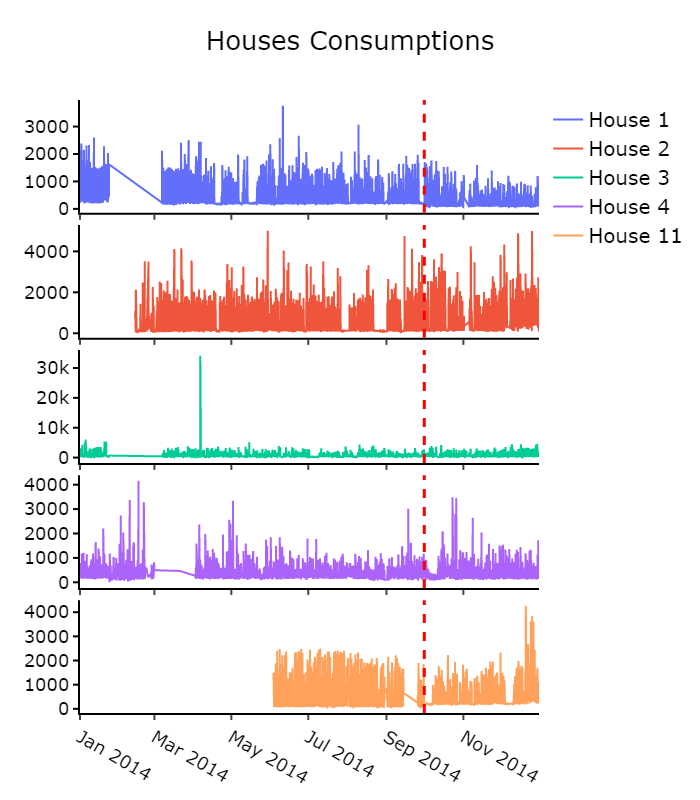

In [13]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [19]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

In [21]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Time series with minimum score is (H_{min_i}, T_{min_j}).')

Time series with minimum score is (H_11, T_1).


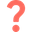
Проанализируйте и изложите содержательный смысл полученных результатов.

Минимальную оценку выдал результат H11 T1 что является верным.